# Jupyter notebooks

You can also create content with Jupyter Notebooks, using the [MyST-NB Sphinx extension](https://myst-nb.readthedocs.io/en/latest/).

This page demonstrates some extra functionality that works with this theme.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](../images/cool.jpg)

You an also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{align*}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{align*}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## Code blocks and image outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np

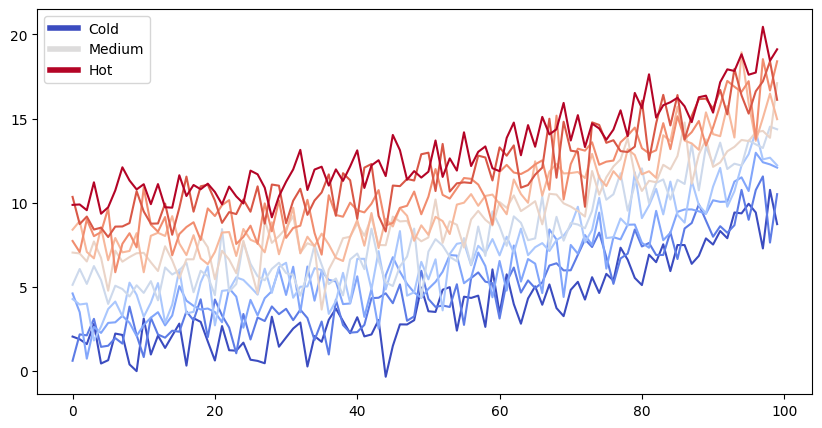

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

Note that the image above is captured and displayed.

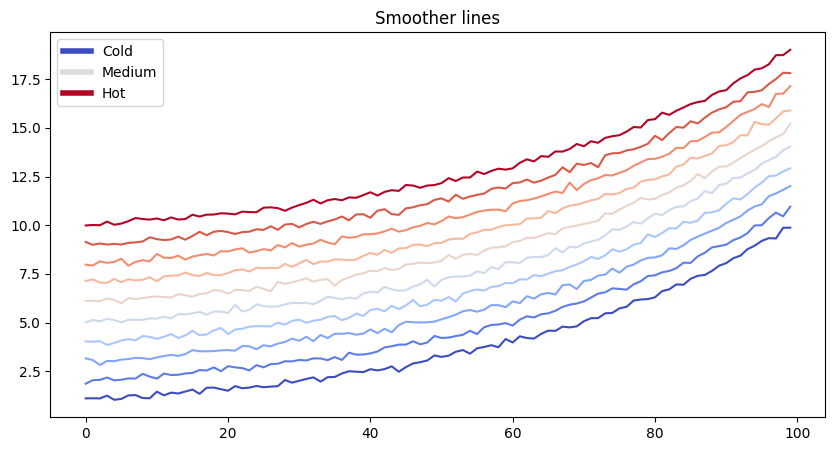

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + .1*np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
ax.set(title="Smoother lines");

```{margin} You can also pop out content to the margin
For more information on how to do this,
check out [](content-blocks.md).
```

In [4]:
print("this works for code cells too, if you add a `margin` tag to them")

this works for code cells too, if you add a `margin` tag to them


In [5]:
# You can also include enriched outputs like Math
from IPython.display import Math
Math("\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}")

<IPython.core.display.Math object>

## Removing content before publishing

You can also remove some content before publishing your book to the web. For example,
in {download}`./notebooks.md`, there used to be a cell below...

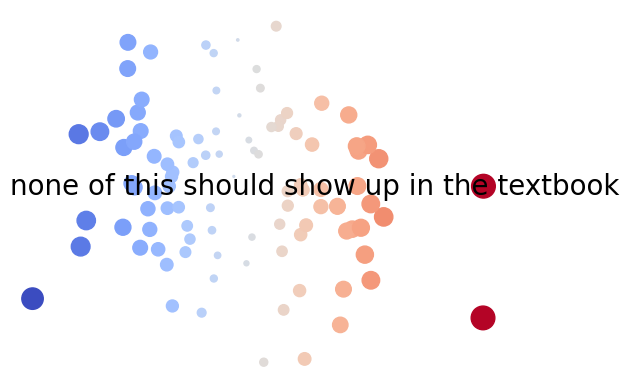

In [6]:
thisvariable = "none of this should show up in the textbook"

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

You can also **remove only the code** so that images and other output still show up.

Below we'll *only* display an image. It was generated with Python code in a cell,
which you can {download}`see in the original notebook <./notebooks.md>`.

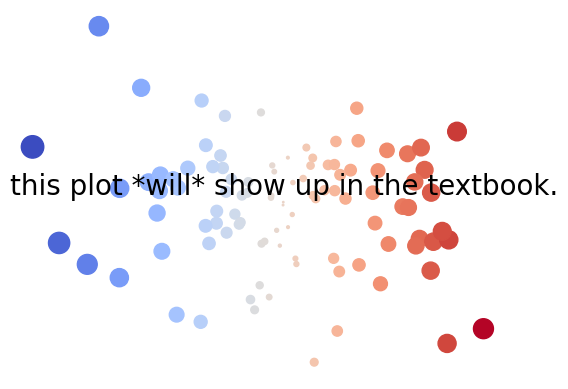

In [7]:
thisvariable = "this plot *will* show up in the textbook."

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

And here we'll *only* display a Pandas DataFrame.

In [8]:
import pandas as pd
df = pd.DataFrame([['hi', 'there'], ['this', 'is'], ['a', 'DataFrame']], columns=['Word A', 'Word B'])
df

/tmp/ipykernel_755/671471819.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Word A     Word B
0     hi      there
1   this         is
2      a  DataFrame

You can even style Pandas DataFrames!
See [the Pandas Styling docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) for more information.

In [9]:
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

/tmp/ipykernel_755/645148677.py:27: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  applymap(color_negative_red).\


Testing margins before headers

## Interactive outputs

We can even do the same for *interactive* material. Below we'll display a map using [folium](https://python-visualization.github.io/folium/). When the notebook
is converted to Markdown, the code for creating the interactive map is retained.

**Note that this will only work for some packages.** They need to be able to output standalone HTML/Javascript, and not
depend on an underlying Python kernel to work.

In [10]:
import folium

In [11]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain',
    attr="Placeholder attr"
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud'),
    attr="Placeholder attr"
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup='Some Other Location',
    icon=folium.Icon(color='red', icon='info-sign'),
    attr="Placeholder attr"
).add_to(m)


m

## Rich outputs from notebook cells

Because notebooks have rich text outputs, you can store these in
your Jupyter Book as well!

In [12]:
# The ! causes this to run as a shell command
!jupyter -h

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: execute kernel kernelspec migrate run troubleshoot
trust


## Formatting code cells

### Scrolling cell outputs

The traditional Jupyter Notebook interface allows you to toggle **output scrolling**
for your cells. This allows you to visualize part of a long output without it taking up
the entire page.

You can trigger this behavior in Jupyter Book by adding the following
tag to a cell's metadata:

```json
{
    "tags": [
        "scroll-output",
    ]
}
```

For example, the following cell has a long output, but will be scrollable in the book:

In [13]:
for ii in range(40):
    print(f"this is output line {ii}")

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39


### Scrolling cell inputs

If your input code is long and takes up a lot of your page, you can make it scrollable
as well by adding the following tag to a cell's metadata:

```json
{
    "tags": [
        "scroll-input",
    ]
}
```

For example, the following cell has a long input, but will be scrollable in the book:

In [14]:
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
print(b)

This line has no meaning
